In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("studentScores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed column

In [6]:
df= df.drop("Unnamed: 0",axis= 1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender Distribution

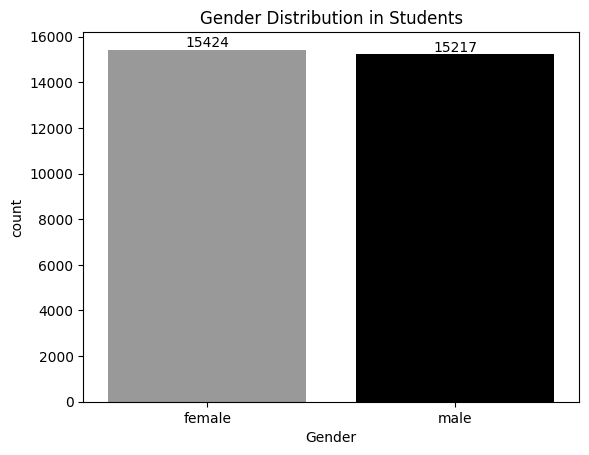

In [7]:
plot= sns.countplot(data= df, x= "Gender",hue= "Gender", legend= False, palette= ["#999", "#000"])
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
#plt.figure(figsize=(5,5))
plt.title("Gender Distribution in Students")
plt.show()

### Here the number of females is more than the males in the school, though not much significant difference is there.

# Effect of Parent's education of Student's scores

In [8]:
group= df.groupby("ParentEduc").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})
print(group)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


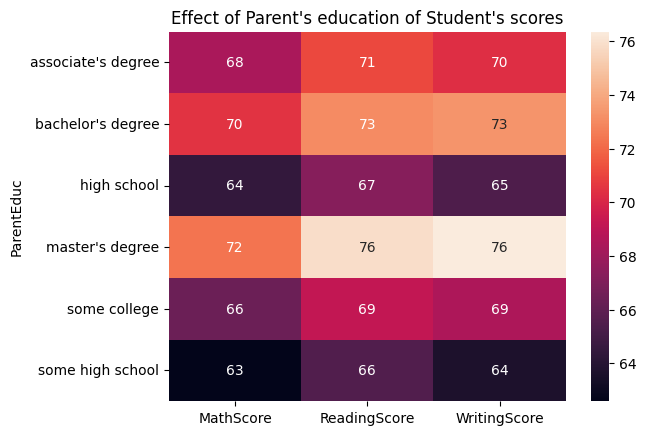

In [9]:
sns.heatmap(group, annot= True)
plt.title("Effect of Parent's education of Student's scores")
plt.show()

### We can conclude that parent's education has great impact on the students's results i.e. children of highly qualified like those with Masters's degree tend to score more compared to others.

# Effect of Parent's marital status on Student's scores

In [10]:
group1= df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})
print(group1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


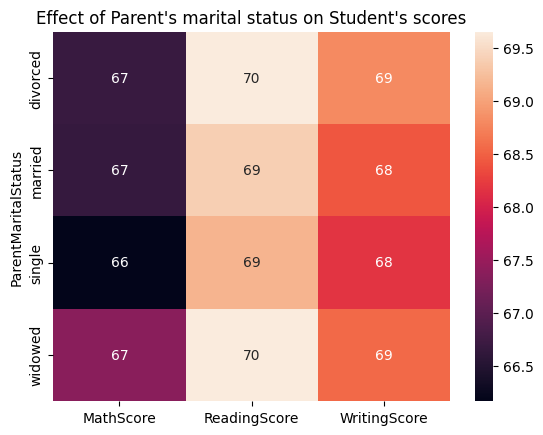

In [11]:
sns.heatmap(group1, annot= True)
plt.title("Effect of Parent's marital status on Student's scores")
plt.show()

### We can conclude that parent's marital status has no significant effect on the student's results

# Checking for any outliers or extreme values

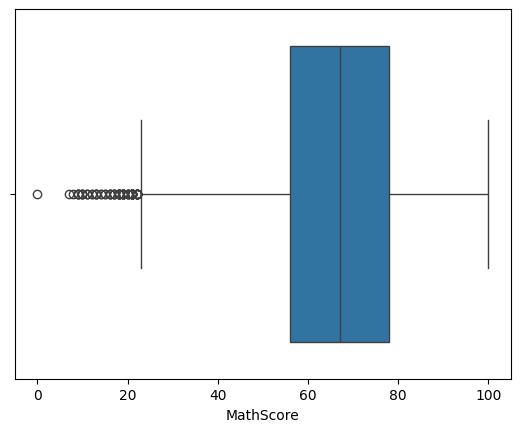

In [12]:
sns.boxplot(data= df, x= "MathScore")
plt.show()

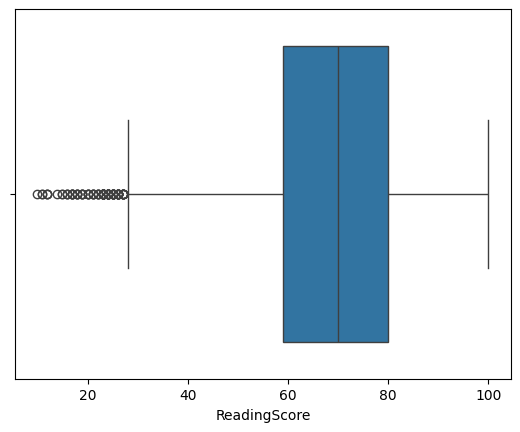

In [13]:
sns.boxplot(data= df, x= "ReadingScore")
plt.show()

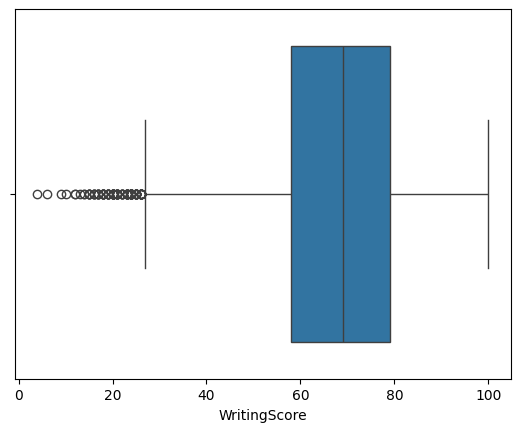

In [14]:
sns.boxplot(data= df, x= "WritingScore")
plt.show()

### Yes, there are some outliers in every subject but the range of marks is the least in Mathematics and there is even a student with zero mark. This tells about maths being the tuffest subject to score in.

# Checking marks for the first child

In [15]:
group1= df.groupby("IsFirstChild").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})
print(group1)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


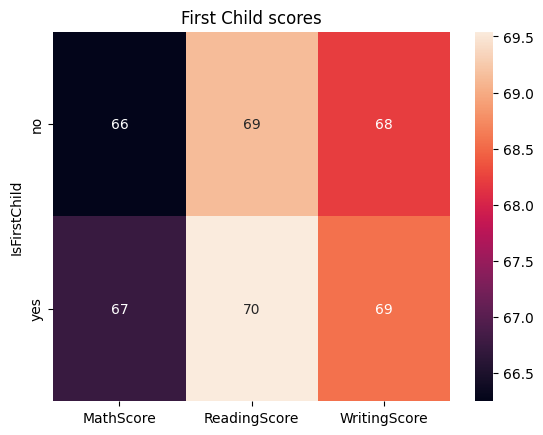

In [16]:
sns.heatmap(group1, annot= True)
plt.title("First Child scores")
plt.show()

### We can conclude that students who are firstborn generally have better IQ and achieve greater scores.

# Based on ethnic group

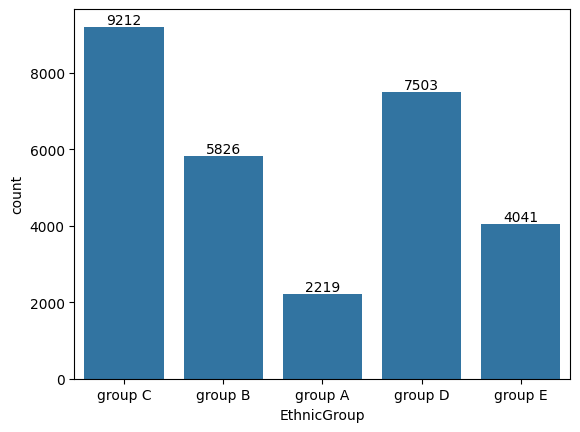

In [17]:
eth_grp= sns.countplot(data= df, x= "EthnicGroup")
eth_grp.bar_label(eth_grp.containers[0])
plt.show()

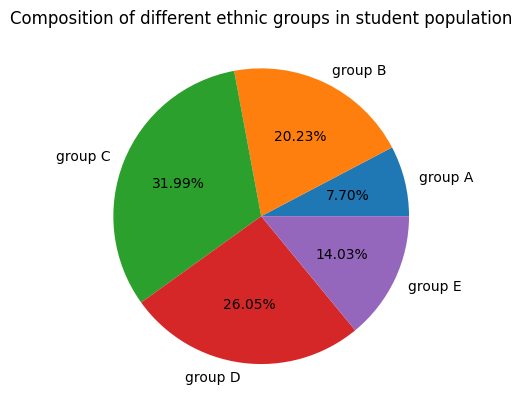

In [18]:
groupA= df.loc[df["EthnicGroup"] == "group A"].count()
groupB= df.loc[df["EthnicGroup"] == "group B"].count()
groupC= df.loc[df["EthnicGroup"] == "group C"].count()
groupD= df.loc[df["EthnicGroup"] == "group D"].count()
groupE= df.loc[df["EthnicGroup"] == "group E"].count()

ethList= [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
label= ["group A", "group B", "group C", "group D", "group E"]
plt.pie(ethList, labels= label, autopct= "%1.2f%%")
plt.title("Composition of different ethnic groups in student population")
plt.show()

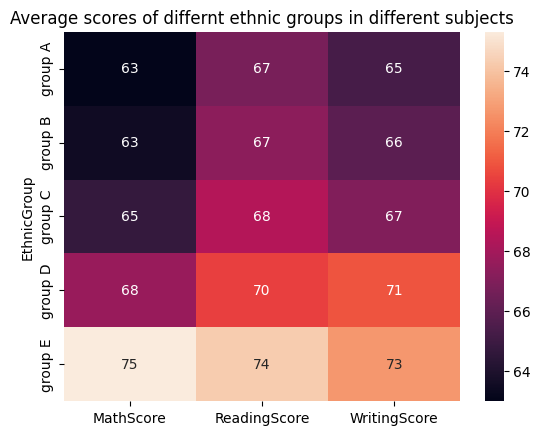

In [19]:
ethGroup= df.groupby("EthnicGroup").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})
sns.heatmap(ethGroup, annot= True)
plt.title("Average scores of differnt ethnic groups in different subjects")
plt.show()

### We can conclude that group C offers the most number of students but they all are average students.
### Group E students by far surpasses all other students in each and every field, especially in maths and reading even after being a minority.

# Comparison between enthnic groups and parents's education in them

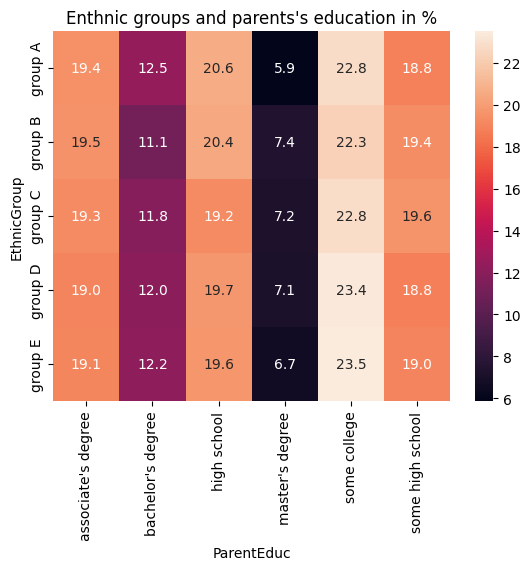

In [20]:
ethGrp_parentEdu= df.groupby(["EthnicGroup", "ParentEduc"]).size().unstack(fill_value= 0)
ethGrp_parentEdu_percentage= ethGrp_parentEdu.div(ethGrp_parentEdu.sum(axis= 1), axis= 0)*100
sns.heatmap(ethGrp_parentEdu_percentage, annot= True, fmt= ".1f")
plt.title("Enthnic groups and parents's education in %")
plt.show()

### From this we can conclude that all the ethnic groups have almost the same distribution of education in the parents.

# Checking for test preperations of students 

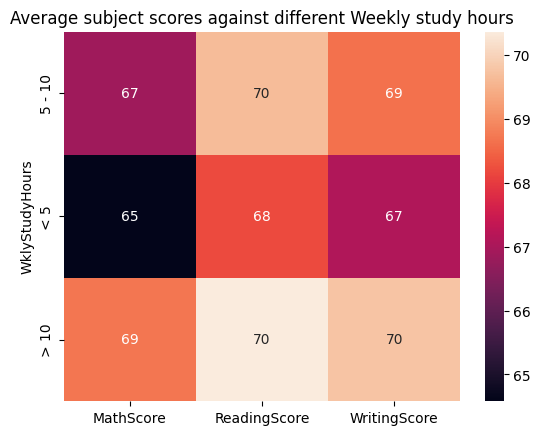

In [21]:
studyHrs= df.groupby(["WklyStudyHours"]).agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"}) 
sns.heatmap(studyHrs, annot= True)
plt.title("Average subject scores against different Weekly study hours")
plt.show()

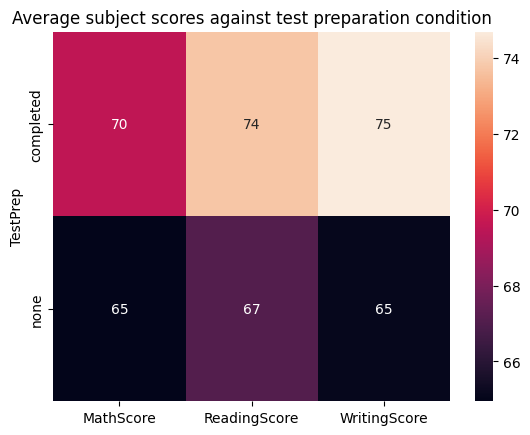

In [22]:
testPrep= df.groupby(["TestPrep"]).agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"}) 
sns.heatmap(testPrep, annot= True)
plt.title("Average subject scores against test preparation condition")
plt.show()

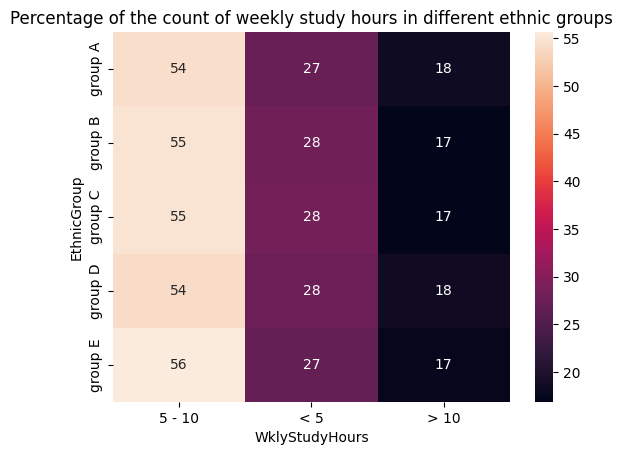

In [23]:
studyHrs= df.groupby(["EthnicGroup", "WklyStudyHours"]).size().unstack(fill_value=0)
studyHrsPercent= studyHrs.div(studyHrs.sum(axis=1), axis=0)* 100
sns.heatmap(studyHrsPercent, annot= True)
plt.title("Percentage of the count of weekly study hours in different ethnic groups")
plt.show()

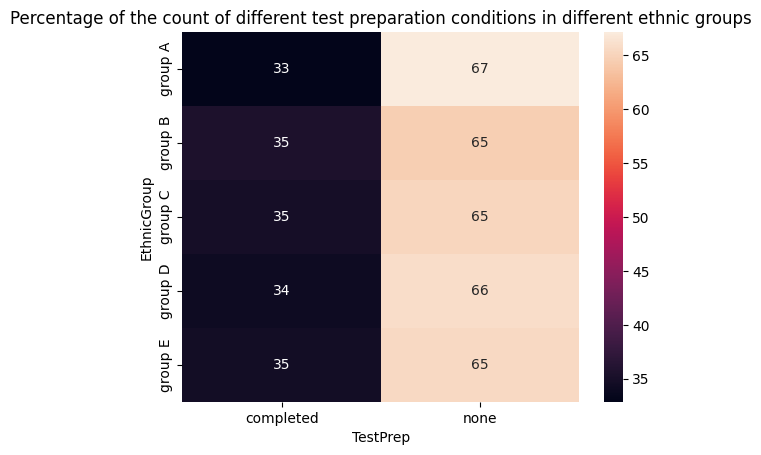

In [24]:
testPrep= df.groupby(["EthnicGroup", "TestPrep"]).size().unstack(fill_value="none")
testPrepPercent= testPrep.div(testPrep.sum(axis=1), axis=0)*100
sns.heatmap(testPrepPercent, annot= True)
plt.title("Percentage of the count of different test preparation conditions in different ethnic groups")
plt.show()

### After looking at the study hours, test preperation and ethnic group comparison we can tell that students with high study hours and completed preparation of the exam are more likey to achive good results.
### But we still could not find any significant speciality as to why "Group E" has the most outstanding students

# Checking the first child count in different ethnic groups

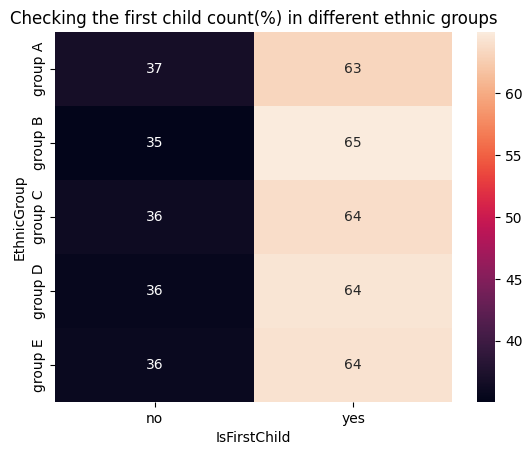

In [25]:
firstChild= df.groupby(["EthnicGroup", "IsFirstChild"]).size().unstack(fill_value= 0)
firstChildPercent= firstChild.div(firstChild.sum(axis=1), axis=0)* 100
sns.heatmap(firstChildPercent, annot= True)
plt.title("Checking the first child count(%) in different ethnic groups")
plt.show()

### No anomalies found here

# Checking for indulgence of students in sports

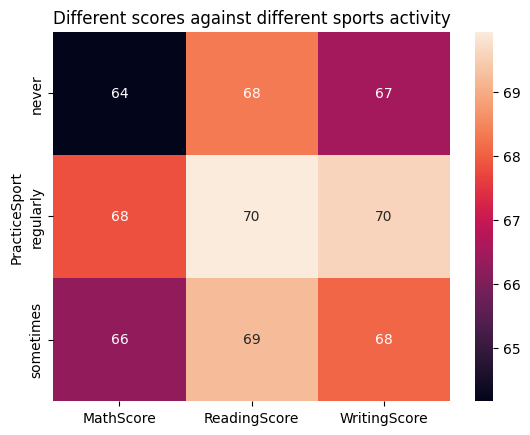

In [26]:
sport= df.groupby(["PracticeSport"]).agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"}) 
sns.heatmap(sport, annot= True)
plt.title("Different scores against different sports activity")
plt.show()

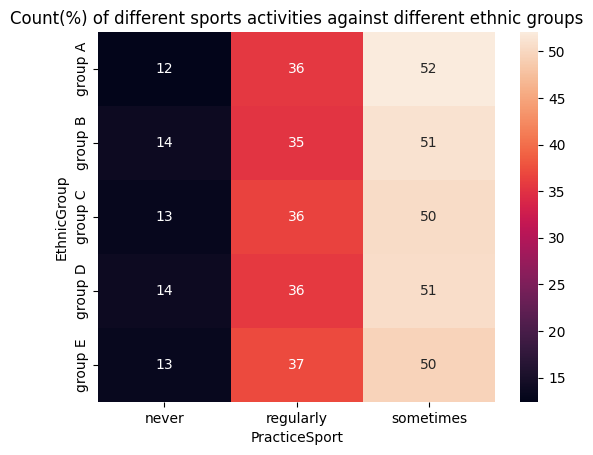

In [27]:
sportE= df.groupby(["EthnicGroup", "PracticeSport"]).size().unstack(fill_value= "sometimes")
sportEPercent= sportE.div(sportE.sum(axis=1), axis=0) *100
sns.heatmap(sportEPercent, annot= True)
plt.title("Count(%) of different sports activities against different ethnic groups")
plt.show()

### This tells us that all the bright students practice sports regularly

# Final Conclusion

### The final conclusion from the above analysis
* Parent Education tends to have a great impact on their children's education and scores
* Student scores are unaffected by parent's marital status
* Maths is the tuffest subject
* First-borns tend to have more intelligence
* "Group E" ethnic group focuses more on teaching their young ones
* Students who put in more hours and/or have complete preparation tend to score higher than others
* Students with more interset in sports tend to achieve higher scores